Listing 5.1 NumPyの例

In [ ]:
import numpy as np
x = np.matrix([[1,2],[3,4]])
y = np.matrix([[5,6],[7,8]])
print(x * y)

[[19 22]
 [43 50]]


Listing 5.2 SciPyの例

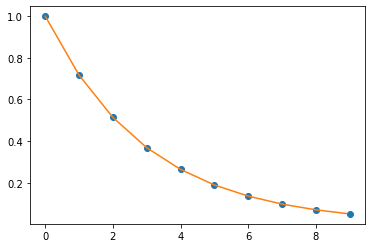

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

Listing 5.3 pandasの例

In [ ]:
import pandas as pd
import numpy as np
# load the contents of CSV file : pd.read_csv('data.csv')
df = pd.DataFrame(np.random.randn(10,4), columns = list('ABCD'))
days = pd.date_range('20211201', periods=10)
df.index = days
print(df)
print(df.describe())
print(df.sort_values('A', axis=0))

                   A         B         C         D
2021-12-01  0.409610 -0.771407  0.256398 -2.201865
2021-12-02 -1.091556 -0.536680  0.046260  1.134172
2021-12-03  1.928421 -1.177110  0.784909 -1.090913
2021-12-04 -0.844536  0.149926 -0.109208 -0.360448
2021-12-05  1.048445  0.237597  0.484532  1.011402
2021-12-06 -2.065979  0.610938 -0.764356 -0.706379
2021-12-07  0.364573  0.717926  1.050414  0.337089
2021-12-08  0.416630  1.331301  0.935091 -0.422883
2021-12-09 -0.220778  0.377020 -0.735038  0.529699
2021-12-10 -0.898619  0.606596 -1.890706 -0.270076
               A          B          C          D
count  10.000000  10.000000  10.000000  10.000000
mean   -0.095379   0.154611   0.005830  -0.204020
std     1.165743   0.765920   0.919382   1.011391
min    -2.065979  -1.177110  -1.890706  -2.201865
25%    -0.885098  -0.365029  -0.578580  -0.635505
50%     0.071897   0.307309   0.151329  -0.315262
75%     0.414875   0.609852   0.709815   0.481546
max     1.928421   1.331301   1.050414 

Listing 5.5 Matplotlibの例

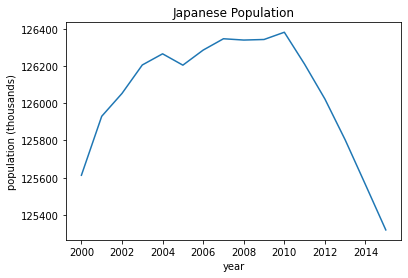

In [ ]:
import matplotlib.pyplot as plt
year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, \
        2013, 2014, 2015]
population = [125613, 125930, 126053, 126206, 126266, 126205, 126286, 126347, 126340, \
              126343, 126382, 126210, 126023, 125803, 125562, 125319]
plt.plot(year, population)
plt.title("Japanese Population")
plt.xlabel("year")
plt.ylabel("population (thousands)")
plt.show()

Listing 5.6 Seabornの例

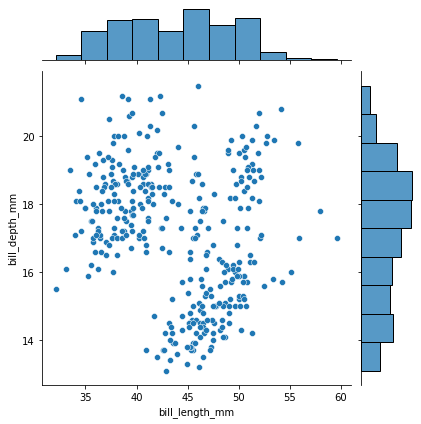

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

plt.show()

Listing 5.7 scikit-learnの例

In [ ]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(iris.data) 
print(k_means.labels_[::10])
print(iris.target[::10])

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


Listing 5.8 t-SNEの例

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


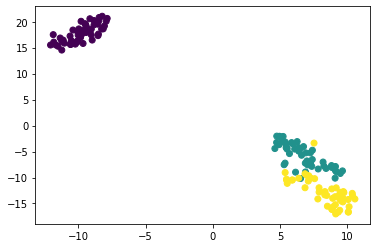

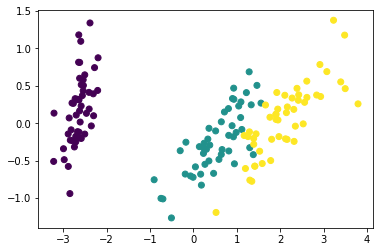

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

iris = load_iris()
X_tsne = TSNE(learning_rate=100).fit_transform(iris.data)
X_pca = PCA().fit_transform(iris.data)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.show()

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.show()

Listing 6.1 インポート

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams.update({'font.size': 16})

Listing 6.2 真のモデル

In [ ]:
input_dim = 1
output_dim = 1

A = 2 * np.random.rand(output_dim, input_dim) - 1
b = 2 * np.random.rand(output_dim) - 1

true_model = lambda x: A @ x + b

Listing 6.3 訓練データ

In [ ]:
n_train = 1000
noise_level = 0.04

# Generate a random set of n_train samples
X_train = np.random.rand(n_train, input_dim)
y_train = np.array([true_model(x) for x in X_train])

# Add some noise
y_train += noise_level * np.random.standard_normal(size=y_train.shape)

Listing 6.4 訓練データの可視化

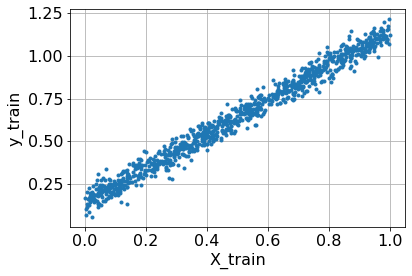

In [ ]:
if input_dim == output_dim == 1:
  fig = plt.figure()
  fig.clf()
  ax = fig.gca()
  ax.plot(X_train, y_train, '.')
  ax.grid(True)
  ax.set_xlabel('X_train')
  ax.set_ylabel('y_train')

Listing 6.5 VectorialDatasetの定義

In [ ]:
#%% Dataset to manage vector to vector data
class VectorialDataset(torch.utils.data.Dataset):
    def __init__(self, input_data, output_data):
        super(VectorialDataset, self).__init__()
        self.input_data = torch.tensor(input_data.astype('f'))
        self.output_data = torch.tensor(output_data.astype('f'))
        
    def __len__(self):
        return self.input_data.shape[0]
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        sample = (self.input_data[idx, :], 
                self.output_data[idx, :])  
        return sample 

Listing 6.6 VectorialDatasetによる訓練データ

In [ ]:
training_set = VectorialDataset(input_data=X_train, output_data=y_train)

Listing 6.7 訓練データの長さ

In [ ]:
len(training_set)

1000

Listing 6.8 訓練データ集合の表示

In [ ]:
training_set[10:12]

(tensor([[0.3819],
         [0.5873]]), tensor([[0.5371],
         [0.6719]]))

Listing 6.9 DataLoaderの定義

In [ ]:
batch_size = 120
train_loader = torch.utils.data.DataLoader(training_set, 
                                            batch_size=batch_size, 
                                            shuffle=True)

Listing 6.10 バッチサイズ

In [ ]:
for idx, batch in enumerate(train_loader):
    print('Batch n. %2d: input size=%s, output size=%s' % (idx+1, batch[0].shape, \
            batch[1].shape))

Batch n.  1: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  2: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  3: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  4: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  5: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  6: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  7: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  8: input size=torch.Size([120, 1]), output size=torch.Size([120, 1])
Batch n.  9: input size=torch.Size([40, 1]), output size=torch.Size([40, 1])


Listing 6.11 shuffle

In [ ]:
first_batch = []

for epoch in range(2):
    for idx, batch in enumerate(train_loader):
        if idx == 0:
            first_batch.append(batch)
        
np.c_[X_train[:batch_size], first_batch[0][0].numpy(), first_batch[1][0].numpy()]

array([[4.04284446e-01, 5.83926737e-01, 6.33870244e-01],
       [9.46795349e-02, 1.23523779e-01, 2.63377100e-01],
       [5.25647483e-01, 9.02619481e-01, 8.03119421e-01],
       [2.34420630e-01, 1.09505162e-01, 3.24191332e-01],
       [5.79440663e-01, 8.34507227e-01, 7.57042766e-01],
       [1.65096429e-01, 9.27206397e-01, 9.49120164e-01],
       [2.80161732e-01, 8.90497565e-01, 6.92552328e-01],
       [3.29987366e-01, 5.78467548e-01, 4.65781093e-01],
       [5.78789824e-02, 4.17659014e-01, 6.22545898e-01],
       [8.66370497e-02, 8.92158747e-01, 5.56863785e-01],
       [3.81939105e-01, 7.27770865e-01, 7.03246593e-01],
       [5.87322148e-01, 1.80738479e-01, 4.03440654e-01],
       [2.39594900e-01, 8.60300004e-01, 3.87543976e-01],
       [6.11068528e-01, 7.40441913e-03, 3.06285411e-01],
       [8.58576937e-01, 9.48753804e-02, 1.14877172e-01],
       [9.82041538e-01, 3.86944448e-04, 5.69484413e-01],
       [5.48708335e-01, 2.80161738e-01, 8.50553811e-01],
       [7.90170598e-01, 4.63494

Listing 6.12 モデルの定義

In [ ]:
import torch.nn as nn
import torch

#%% Linear layer
class LinearModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()

        self.input_dim = input_dim
        self.output_dim = output_dim

        self.linear = nn.Linear(self.input_dim, self.output_dim, bias=True)

    def forward(self, x):
        out = self.linear(x)
        return out
    
    def reset(self):
        self.linear.reset_parameters()
        
model = LinearModel(input_dim, output_dim)

Listing 6.13 モデルの表示

In [ ]:
print(model)
list(model.parameters())

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


[Parameter containing:
 tensor([[0.0508]], requires_grad=True), Parameter containing:
 tensor([-0.2054], requires_grad=True)]

Listing 6.14 モデルの初期値の表示

In [ ]:
model.linear.weight

Parameter containing:
tensor([[0.0508]], requires_grad=True)

In [ ]:
model.linear.bias

Parameter containing:
tensor([-0.2054], requires_grad=True)

Listing 6.15 初期値のモデルによる前向き推論

In [ ]:
x = torch.randn(5, input_dim)
model.forward(x)

tensor([[-0.1600],
        [-0.2123],
        [-0.1369],
        [-0.2469],
        [-0.1852]], grad_fn=<AddmmBackward0>)

In [ ]:
[model.linear.weight @ xx + model.linear.bias for xx in x]

[tensor([-0.1600], grad_fn=<AddBackward0>),
 tensor([-0.2123], grad_fn=<AddBackward0>),
 tensor([-0.1369], grad_fn=<AddBackward0>),
 tensor([-0.2469], grad_fn=<AddBackward0>),
 tensor([-0.1852], grad_fn=<AddBackward0>)]

Listing 6.16 訓練データとモデルの可視化

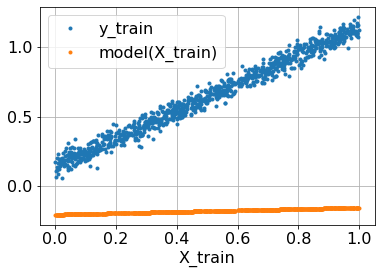

In [ ]:
if input_dim == output_dim == 1:
  fig = plt.figure()
  fig.clf()
  ax = fig.gca()
  ax.plot(training_set.input_data, training_set.output_data, '.')
  ax.plot(training_set.input_data, model.forward(training_set.input_data).detach().numpy(), '.')
  ax.grid(True)
  ax.set_xlabel('X_train')
  ax.legend(['y_train', 'model(X_train)']) 

Listing 6.17 損失の値

In [ ]:
import torch.nn as nn
loss_fun = nn.MSELoss(reduction='mean')
    
x = torch.tensor(np.array([1, 2, 1]).astype('f'))
z = torch.tensor(np.array([0, 0, 0]).astype('f'))
loss_fun(x, z)  

tensor(2.)

Listing 6.18 訓練データによる損失

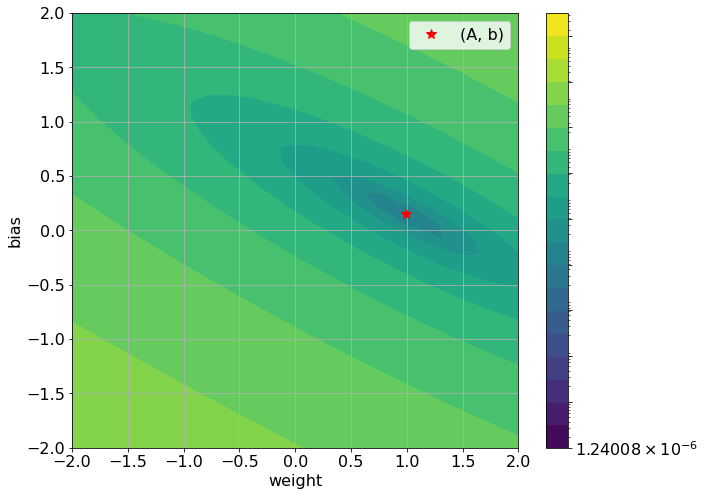

In [ ]:
if input_dim == output_dim == 1:

  state_dict = model.state_dict()

  ww, bb = np.meshgrid(np.linspace(-2, 2, 30), np.linspace(-2, 2, 30))

  loss_values = 0 * ww
  for i in range(ww.shape[0]):
    for j in range(ww.shape[1]):
        state_dict['linear.weight'] = torch.tensor([[ww[i, j]]])
        state_dict['linear.bias'] = torch.tensor([bb[i, j]])
        model.load_state_dict(state_dict)
        loss_values[i, j] = loss_fun(model.forward(training_set.input_data), \
        training_set.output_data)

  fig = plt.figure(figsize=(10, 8))
  fig.clf()
  ax = fig.gca()
  levels = np.logspace(np.log(np.min(loss_values)), np.log(np.max(loss_values)), 20)
  c=ax.contourf(ww, bb, loss_values, levels=levels, norm=colors.LogNorm())
  plt.colorbar(c)
  ax.plot(A[0], b, 'r*', markersize=10)
  ax.set_ylabel('bias')
  ax.set_xlabel('weight')
  ax.legend(['(A, b)'])
    
  ax.grid(True)

Listing 6.19 勾配の計算

In [ ]:
x = torch.randn(1, input_dim)
y = torch.randn(1, output_dim)

model.zero_grad()
loss = loss_fun(model.forward(x),  y)
loss.backward()
    
if input_dim == output_dim == 1:
    print(model.linear.weight.grad)
    print(2 * x * (model.linear.weight * x + model.linear.bias - y))
    
    print(model.linear.bias.grad)
    print(2 * (model.linear.weight * x + model.linear.bias - y))


tensor([[0.2735]])
tensor([[0.2735]], grad_fn=<MulBackward0>)
tensor([3.5754])
tensor([[3.5754]], grad_fn=<MulBackward0>)


Listing 6.20 Aとbの更新

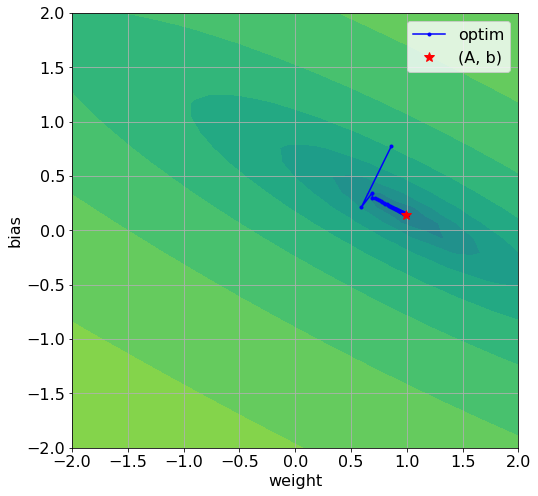

In [ ]:
if input_dim == output_dim == 1:

    num_iter = 200
    lr = 0.5 # 0.01

    train_hist = {}
    train_hist['weight'] = []
    train_hist['bias'] = []

    model.reset()
    state_dict = model.state_dict()

    for _ in range(num_iter):

        model.zero_grad()
        loss = loss_fun(model.forward(training_set.input_data), training_set.output_data)
        loss.backward()

        w = model.linear.weight.item()
        b = model.linear.bias.item()

        dw = model.linear.weight.grad.item()
        db = model.linear.bias.grad.item()

        state_dict['linear.weight'] += torch.tensor([-lr * dw])
        state_dict['linear.bias'] += torch.tensor([-lr * db])
        model.load_state_dict(state_dict)

        train_hist['weight'].append(w)
        train_hist['bias'].append(b)

    for label in train_hist:
        train_hist[label] = np.array(train_hist[label])

if input_dim == output_dim == 1:
    fig = plt.figure(figsize=(8, 8))
    fig.clf()
    ax = fig.gca()
    levels = np.logspace(np.log(np.min(loss_values)), np.log(np.max(loss_values)), 20)
    ax.contourf(ww, bb, loss_values, levels=levels, norm=colors.LogNorm())
    ax.set_xlabel('weight')
    ax.set_ylabel('bias')
    ax.grid(True)
    ax.set_xlim(-2, 2) 
    ax.set_ylim(-2, 2) 
    
    ax.plot(train_hist['weight'], train_hist['bias'], '.-b')
    ax.plot(A[0], b, 'r*', markersize=10)

    ax.legend(['optim', '(A, b)'])

Listing 6.21 Adamによる最適化

In [ ]:
lr = 0.1
weight_decay = 5e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

n_epochs = 100
train_hist = {}
train_hist['loss'] = []

if input_dim == output_dim == 1:
    train_hist['weight'] = []
    train_hist['bias'] = []

# Initialize training
model.reset()
model.train()

for epoch in range(n_epochs):
    for idx, batch in enumerate(train_loader):
        optimizer.zero_grad()
        loss = loss_fun(model.forward(batch[0]),  batch[1])
        loss.backward()
        optimizer.step()

        train_hist['loss'].append(loss.item())
        if input_dim == output_dim == 1:
            train_hist['weight'].append(model.linear.weight.item())
            train_hist['bias'].append(model.linear.bias.item())
        
        print('[Epoch %4d/%4d] [Batch %4d/%4d] Loss: % 2.2e' % (epoch + 1, n_epochs, 
                                                                idx + 1, len(train_loader), 
                                                                loss.item()))
        
model.eval()

[Epoch    1/ 100] [Batch    1/   9] Loss:  1.24e+00
[Epoch    1/ 100] [Batch    2/   9] Loss:  1.02e+00
[Epoch    1/ 100] [Batch    3/   9] Loss:  7.24e-01
[Epoch    1/ 100] [Batch    4/   9] Loss:  4.19e-01
[Epoch    1/ 100] [Batch    5/   9] Loss:  2.68e-01
[Epoch    1/ 100] [Batch    6/   9] Loss:  1.89e-01
[Epoch    1/ 100] [Batch    7/   9] Loss:  1.45e-01
[Epoch    1/ 100] [Batch    8/   9] Loss:  1.02e-01
[Epoch    1/ 100] [Batch    9/   9] Loss:  1.08e-01
[Epoch    2/ 100] [Batch    1/   9] Loss:  1.12e-01
[Epoch    2/ 100] [Batch    2/   9] Loss:  1.26e-01
[Epoch    2/ 100] [Batch    3/   9] Loss:  1.59e-01
[Epoch    2/ 100] [Batch    4/   9] Loss:  1.90e-01
[Epoch    2/ 100] [Batch    5/   9] Loss:  1.96e-01
[Epoch    2/ 100] [Batch    6/   9] Loss:  2.01e-01
[Epoch    2/ 100] [Batch    7/   9] Loss:  2.06e-01
[Epoch    2/ 100] [Batch    8/   9] Loss:  1.77e-01
[Epoch    2/ 100] [Batch    9/   9] Loss:  1.59e-01
[Epoch    3/ 100] [Batch    1/   9] Loss:  1.43e-01
[Epoch    3/

LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

Listing 6.22 パラメータの更新過程の可視化

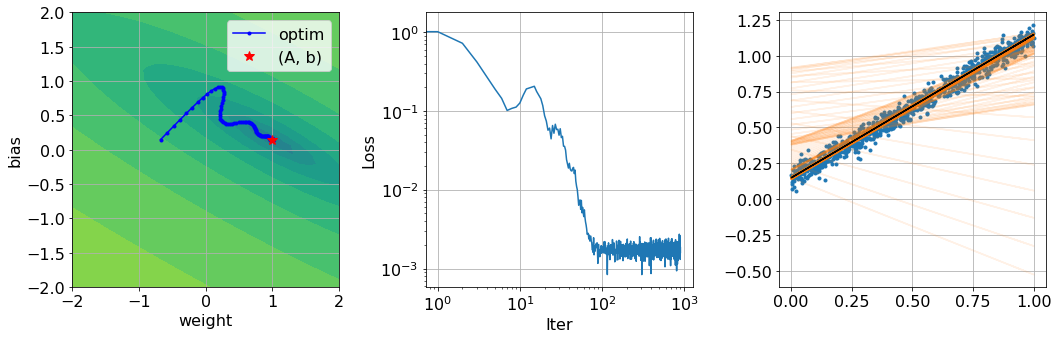

In [ ]:
if input_dim == output_dim == 1:
    n_test = 500
    X_test = np.random.rand(n_test, input_dim)
    y_pred = []

    state_dict = model.state_dict()

    for idx in range(len(train_hist['weight'])):
        state_dict['linear.weight'] = torch.tensor([[train_hist['weight'][idx]]])
        state_dict['linear.bias'] = torch.tensor([train_hist['bias'][idx]])
        model.load_state_dict(state_dict)

        y_pred.append(model.forward(torch.tensor(X_test.astype('f'))).detach().numpy())    

if input_dim == output_dim == 1:
    fig = plt.figure(figsize=(15, 5))
    fig.clf()
    
    ax = fig.add_subplot(1, 3, 1)
    levels = np.logspace(np.log(np.min(loss_values)), np.log(np.max(loss_values)), 20)
    ax.contourf(ww, bb, loss_values, levels=levels, norm=colors.LogNorm())
    ax.plot(train_hist['weight'], train_hist['bias'], '.-b')
    ax.plot(A[0], b, 'r*', markersize=10)
    ax.set_xlabel('weight')
    ax.set_ylabel('bias')
    ax.legend(['optim', '(A, b)'])
    ax.grid(True)
    ax.set_xlim(-2, 2) 
    ax.set_ylim(-2, 2) 
    
    ax = fig.add_subplot(1, 3, 2)
    ax.loglog(np.abs(train_hist['loss']))
    ax.set_xlabel('Iter')
    ax.set_ylabel('Loss')
    ax.grid(True)
    
    ax = fig.add_subplot(1, 3, 3)
    ax.plot(X_train, y_train, '.')
    a=ax.plot(X_test, y_pred[0], '-', alpha=0.1)
    for y in y_pred[1:]:
        ax.plot(X_test, y, '-', alpha=0.1, color=a[0].get_color())
    ax.plot(X_test, y_pred[-1], 'k')
    ax.grid(True)   

    fig.tight_layout()

else:
    fig = plt.figure()
    fig.clf()
    ax = fig.gca()
    ax.loglog(np.abs(train_hist['loss']))
    ax.set_xlabel('Iter')
    ax.set_ylabel('Loss')
    ax.grid(True)

PyTorch Geometricのインストール (https://pytorch-geometric.readthedocs.io/en/latest/notes/colabs.html より)

In [1]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

1.11.0+cu113
     |████████████████████████████████| 7.9 MB 2.6 MB/s 
     |████████████████████████████████| 3.5 MB 2.8 MB/s 


Listing 6.23 無向グラフの定義(1)

In [2]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

In [3]:
print(data)

Data(x=[3, 1], edge_index=[2, 4])


Listing 6.24 無向グラフの定義(2)

In [4]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())

In [5]:
print(data)

Data(x=[3, 1], edge_index=[2, 4])


Listing 6.25 関数の資料例

In [7]:
print(data.keys)
#>>> ['x', 'edge_index']

print(data['x'])
#>>> tensor([[-1.0],
#            [0.0],
#            [1.0]])
for key, item in data:
    print("{} found in data".format(key))
#>>> x found in data
#>>> edge_index found in data
print('edge_attr' in data)
#>>> False
print(data.num_nodes)
#>>> 3
print(data.num_edges)
#>>> 4
print(data.num_node_features)
#>>> 1
print(data.contains_isolated_nodes())
#>>> False
print(data.contains_self_loops())
#>>> False
print(data.is_directed())
#>>> False
# Transfer data object to GPU.
#device = torch.device('cuda')
#data = data.to(device)

['edge_index', 'x']
tensor([[-1.],
        [ 0.],
        [ 1.]])
x found in data
edge_index found in data
False
3
4
1
False
False
False


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


Listing 6.26 ENZYMESデータセットの読み込み

In [ ]:
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
#>>> ENZYMES(600)
print(len(dataset))
#>>> 600
print(dataset.num_classes)
#>>> 6
print(dataset.num_node_features)
#>>> 3

data = dataset[0]
print(data)
#>>> Data(edge_index=[2, 168], x=[37, 3], y=[1])
print(data.is_undirected())
#>>> True

Extracting /tmp/ENZYMES/ENZYMES/ENZYMES.zip
Processing...


600
6
3
Data(edge_index=[2, 168], x=[37, 3], y=[1])
True


Done!


Listing 6.27 データセットの分割

In [ ]:
train_dataset = dataset[:540]
print(train_dataset)
#>>> ENZYMES(540)
test_dataset = dataset[540:]
print(test_dataset)
#>>> ENZYMES(60)

ENZYMES(540)
ENZYMES(60)


Listing 6.28 データセットのshuffle

In [ ]:
dataset = dataset.shuffle()
print(dataset)
#>>> ENZYMES(600)

perm = torch.randperm(len(dataset))
dataset = dataset[perm]
print(dataset)
#>> ENZYMES(600)

ENZYMES(600)
ENZYMES(600)


Listing 6.29 Coraの読み込み

In [ ]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='/tmp/Cora', name='Cora')
#>>> Cora()
print(len(dataset))
#>>> 1
print(dataset.num_classes)
#>>> 7
print(dataset.num_node_features)
#>>> 1433

1
7
1433


Listing 6.30 Coraデータセットの表示

In [ ]:
data = dataset[0]
#>>> Data(edge_index=[2, 10556], test_mask=[2708],
#         train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])
print(data.is_undirected())
#>>> True
print(data.train_mask.sum().item())
#>>> 140
print(data.val_mask.sum().item())
#>>> 500
print(data.test_mask.sum().item())
#>>> 1000

True
140
500
1000


Listing 6.31 PyTorch GeometricのDataLoader

In [ ]:
from torch_geometric.datasets import TUDataset
from torch_geometric.data import DataLoader

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

for batch in loader:
    print(batch)
    #>>> Batch(batch=[1082], edge_index=[2, 4066], x=[1082, 21], y=[32])

    print(batch.num_graphs)
    #>>> 32

/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


DataBatch(edge_index=[2, 4522], x=[1155, 21], y=[32], batch=[1155], ptr=[33])
32
DataBatch(edge_index=[2, 3850], x=[1063, 21], y=[32], batch=[1063], ptr=[33])
32
DataBatch(edge_index=[2, 4002], x=[1000, 21], y=[32], batch=[1000], ptr=[33])
32
DataBatch(edge_index=[2, 4330], x=[1076, 21], y=[32], batch=[1076], ptr=[33])
32
DataBatch(edge_index=[2, 3932], x=[1015, 21], y=[32], batch=[1015], ptr=[33])
32
DataBatch(edge_index=[2, 3668], x=[954, 21], y=[32], batch=[954], ptr=[33])
32
DataBatch(edge_index=[2, 4190], x=[1115, 21], y=[32], batch=[1115], ptr=[33])
32
DataBatch(edge_index=[2, 3926], x=[1032, 21], y=[32], batch=[1032], ptr=[33])
32
DataBatch(edge_index=[2, 3810], x=[1037, 21], y=[32], batch=[1037], ptr=[33])
32
DataBatch(edge_index=[2, 3630], x=[969, 21], y=[32], batch=[969], ptr=[33])
32
DataBatch(edge_index=[2, 3822], x=[999, 21], y=[32], batch=[999], ptr=[33])
32
DataBatch(edge_index=[2, 3906], x=[1005, 21], y=[32], batch=[1005], ptr=[33])
32
DataBatch(edge_index=[2, 3462], x=

Listing 6.32 torch_scatter

In [ ]:
from torch_scatter import scatter_mean
from torch_geometric.datasets import TUDataset
from torch_geometric.data import DataLoader

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

for data in loader:
    print(data)
    #>>> Batch(batch=[1082], edge_index=[2, 4066], x=[1082, 21], y=[32])

    print(data.num_graphs)
    #>>> 32

    x = scatter_mean(data.x, data.batch, dim=0)
    print(x.size())
    #>>> torch.Size([32, 21])

/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


DataBatch(edge_index=[2, 4110], x=[1057, 21], y=[32], batch=[1057], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4100], x=[1077, 21], y=[32], batch=[1077], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 3806], x=[1008, 21], y=[32], batch=[1008], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4140], x=[1053, 21], y=[32], batch=[1053], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4282], x=[1136, 21], y=[32], batch=[1136], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 3098], x=[806, 21], y=[32], batch=[806], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 3692], x=[937, 21], y=[32], batch=[937], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4378], x=[1087, 21], y=[32], batch=[1087], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 3720], x=[1090, 21], y=[32], batch=[1090], ptr=[33])
32
torch.Size([32, 21])
DataBatch(edge_index=[2, 4378], x=[1154, 21], y=[32], batch=[1154], ptr=[33])
32
torch

Listing 6.33 データ変換

In [ ]:
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='/tmp/ShapeNet', categories=['Airplane'])

print(dataset[0])
#>>> Data(pos=[2518, 3], y=[2518])

Extracting /tmp/ShapeNet/shapenetcore_partanno_segmentation_benchmark_v0_normal.zip
Processing...


Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1])


Done!


Listing 6.34 pre_transform

In [ ]:
import torch_geometric.transforms as T
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='/tmp/ShapeNet', categories=['Airplane'],
                    pre_transform=T.KNNGraph(k=6))

print(dataset[0])
#>>> Data(edge_index=[2, 15108], pos=[2518, 3], y=[2518])

/usr/local/lib/python3.7/dist-packages/torch_geometric/data/dataset.py:151: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to delete '/tmp/ShapeNet/processed' first
  f"The `pre_transform` argument differs from the one used in "


Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1])


Listing 6.35 transform

In [ ]:
import torch_geometric.transforms as T
from torch_geometric.datasets import ShapeNet

dataset = ShapeNet(root='/tmp/ShapeNet', categories=['Airplane'],
                    pre_transform=T.KNNGraph(k=6),
                    transform=T.RandomTranslate(0.01))

print(dataset[0])
#>>> Data(edge_index=[2, 15108], pos=[2518, 3], y=[2518])

Data(x=[2518, 3], y=[2518], pos=[2518, 3], category=[1])


/usr/local/lib/python3.7/dist-packages/torch_geometric/data/dataset.py:151: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to delete '/tmp/ShapeNet/processed' first
  f"The `pre_transform` argument differs from the one used in "


Listing Coraの読み込み

In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
print(dataset)
#>>> Cora()

Cora()


Listing 6.37 2層のGCN

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

Listing 6.38 訓練と評価

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    
model.eval()
_, pred = model(data).max(dim=1)
correct = int(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / int(data.test_mask.sum())
print('Accuracy: {:.4f}'.format(acc))
#>>> Accuracy: 0.8150

Accuracy: 0.7930


Listing 6.39 インポートと可視化

In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

1.11.0+cu113


Listing 6.40 Karate Club Network

In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

#>>> Dataset: KarateClub():
#>>> ======================
#>>> Number of graphs: 1
#>>> Number of features: 34
#>>> Number of classes: 4

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


Listing 6.41 Karate Club Networkの特徴量

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

#>>> Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
#>>> ==============================================================
#>>> Number of nodes: 34
#>>> Number of edges: 156
#>>> Average node degree: 4.59
#>>> Number of training nodes: 4
#>>> Training node label rate: 0.12
#>>> Has isolated nodes: False
#>>> Has self-loops: False
#>>> Is undirected: True

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Has isolated nodes: False
Has self-loops: False
Is undirected: True


Listing 6.42 Karate Club Networkの情報

In [ ]:
print(data)
#>>> Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34]) 

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


Listing 6.43 Karate Club Networkのエッジ

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

Listing 6.44 Karate Club Networkの可視化コード

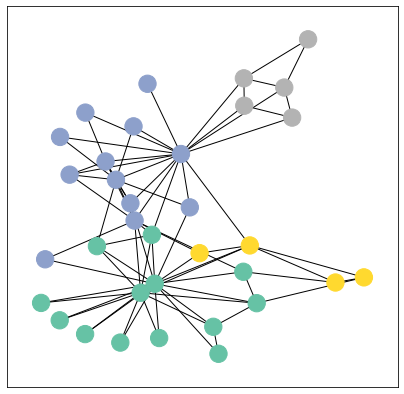

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

Listing 6.45 グラフ畳み込みの定義

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

#>>> GCN(
#>>>   (conv1): GCNConv(34, 4)
#>>>   (conv2): GCNConv(4, 4)
#>>>   (conv3): GCNConv(4, 2)
#>>>   (classifier): Linear(in_features=2, out_features=4, bias=True)
#>>> )

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Listing 6.46 エンベディングの可視化

Embedding shape: [34, 2]


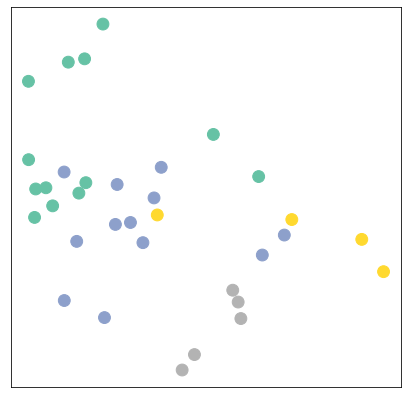

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.y)

Listing 6.47 訓練と評価

<IPython.core.display.Javascript object>

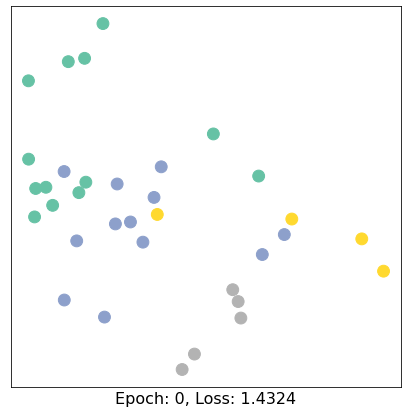

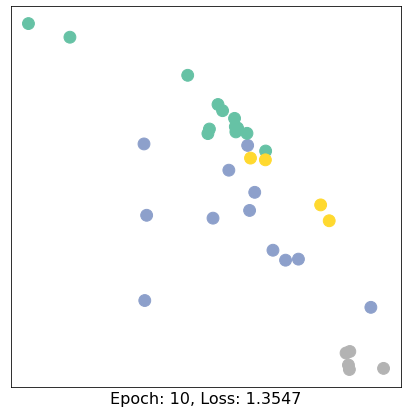

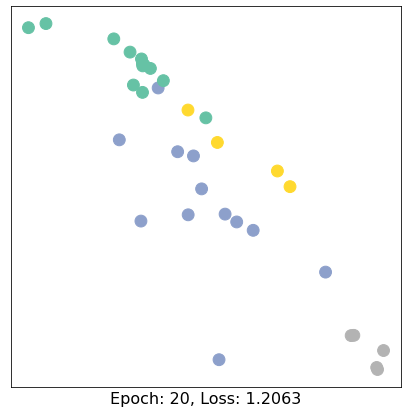

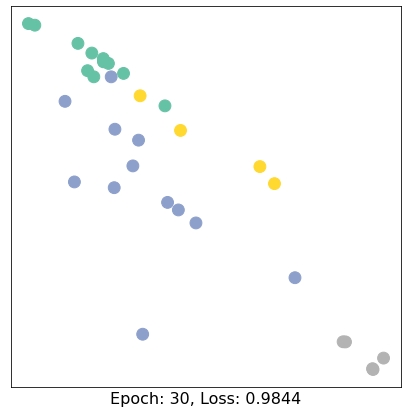

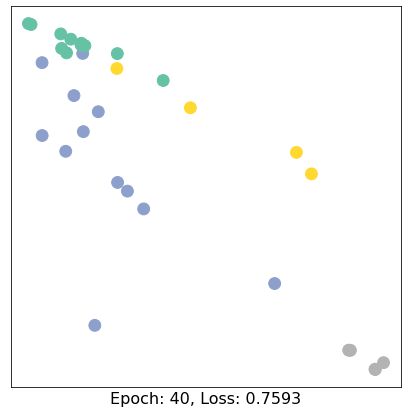

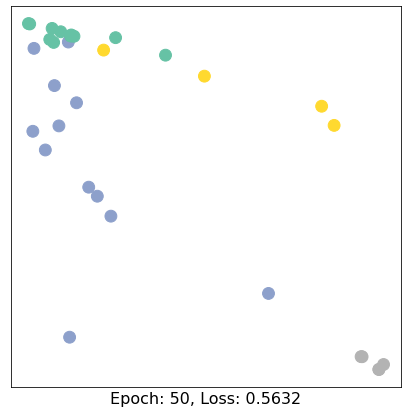

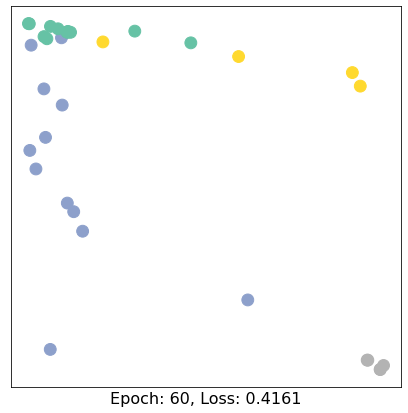

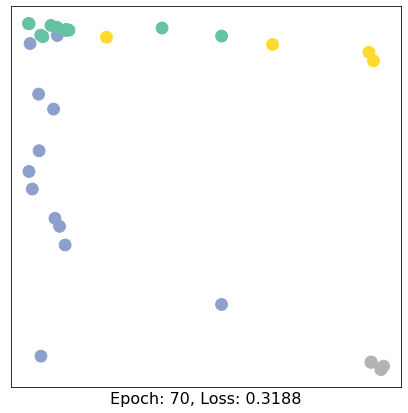

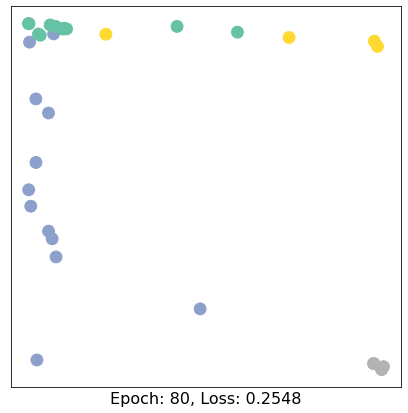

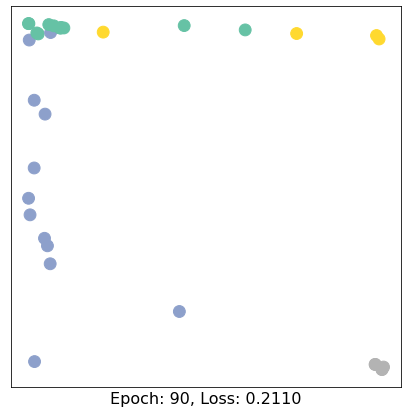

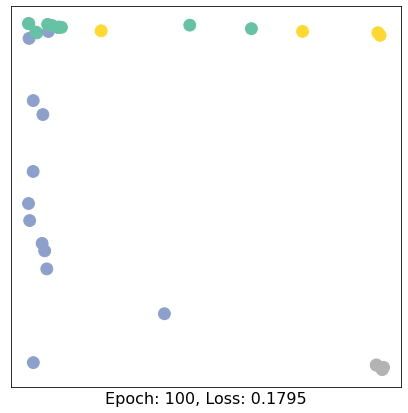

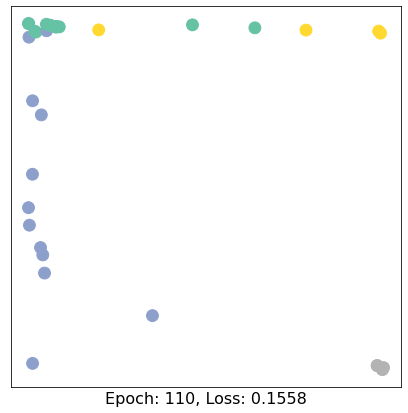

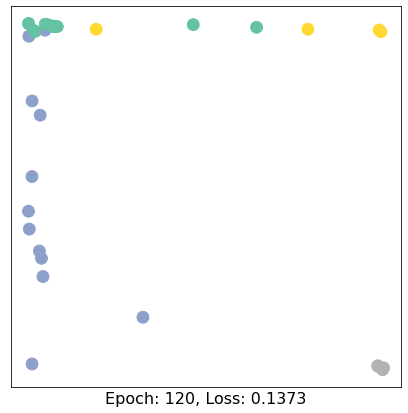

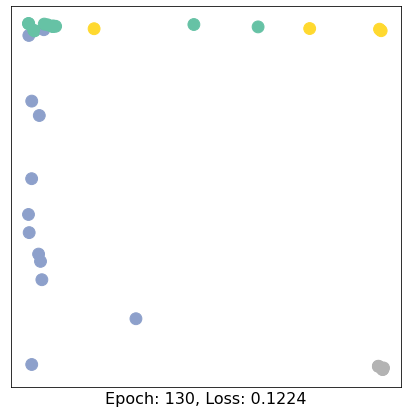

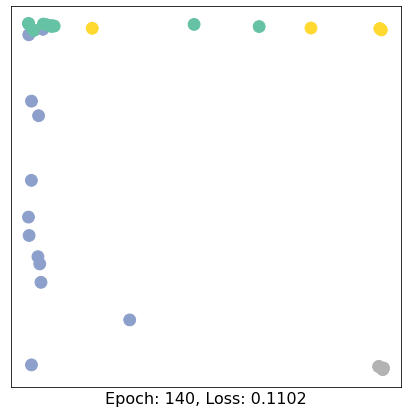

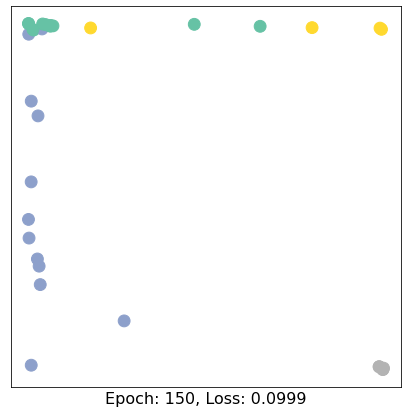

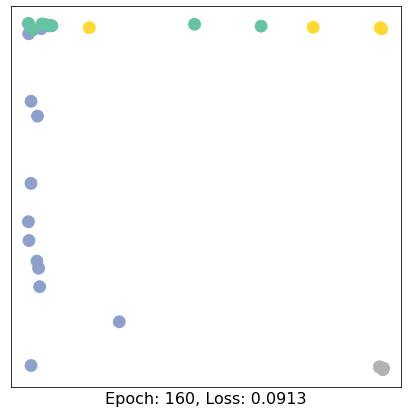

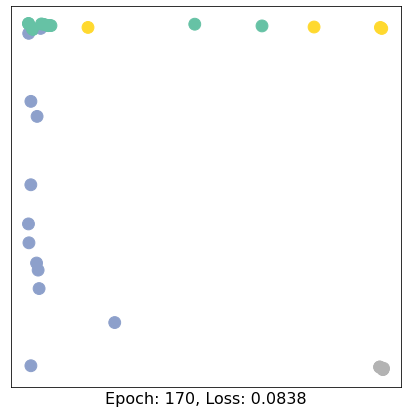

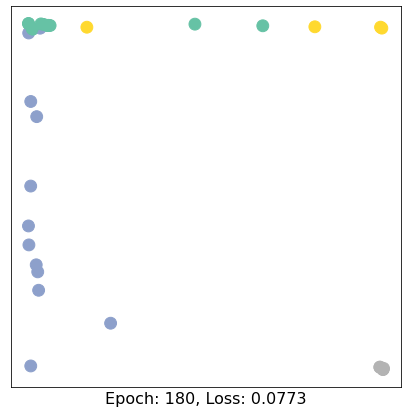

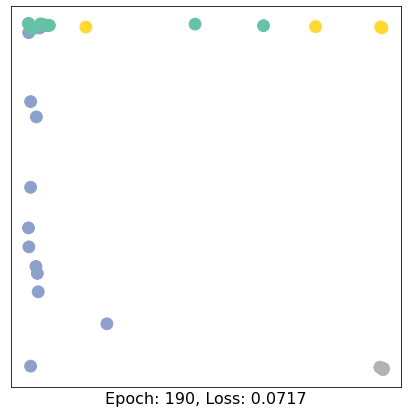

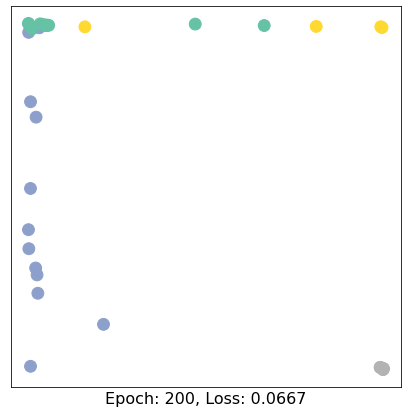

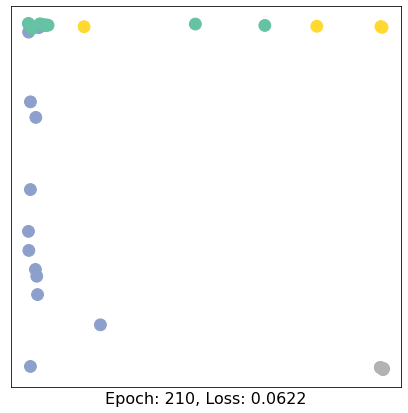

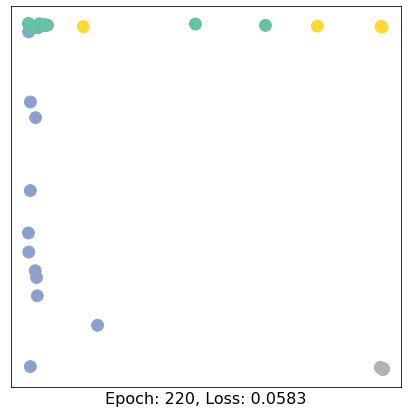

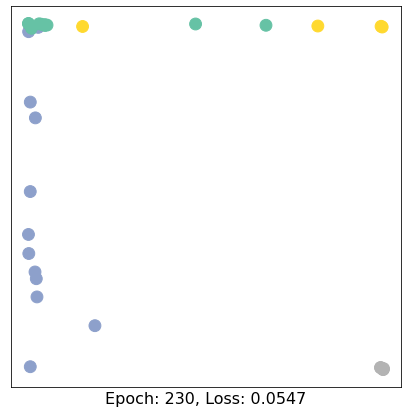

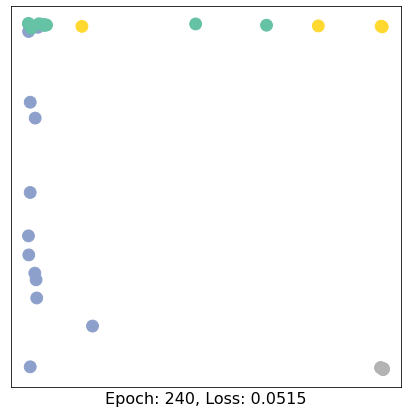

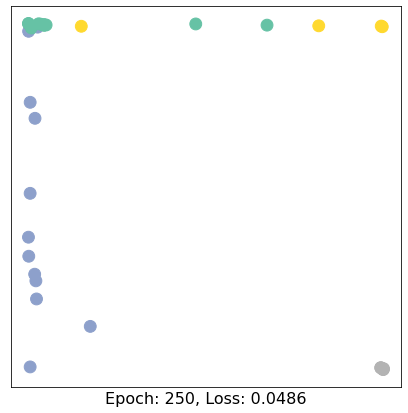

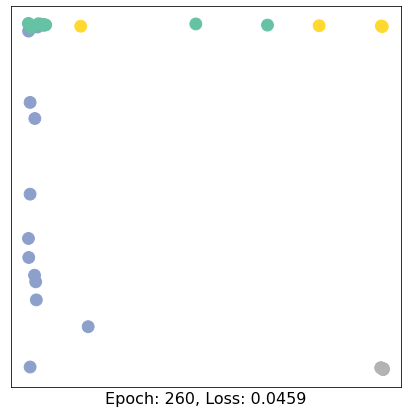

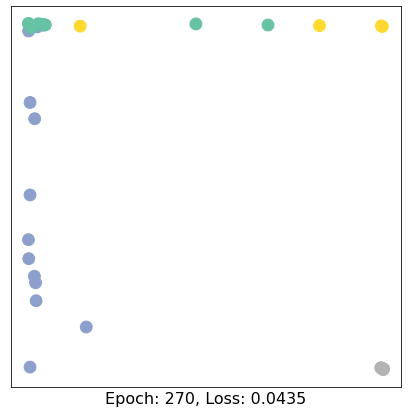

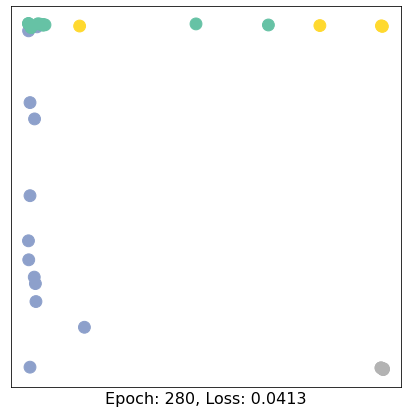

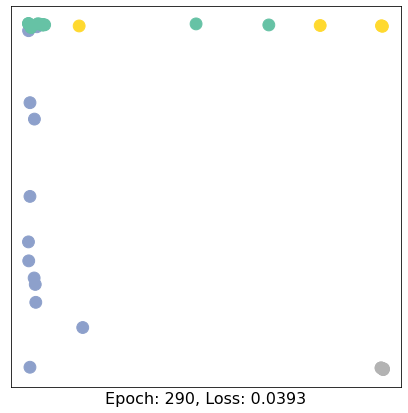

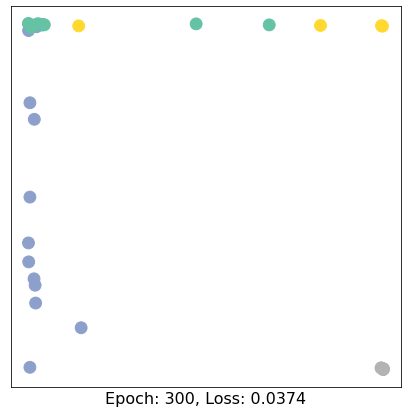

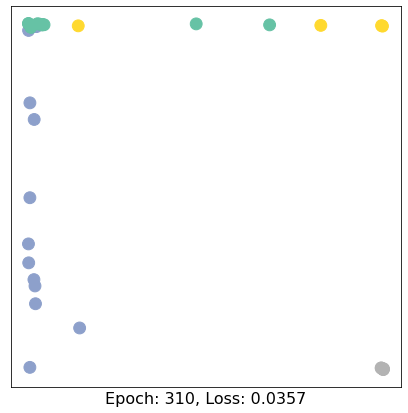

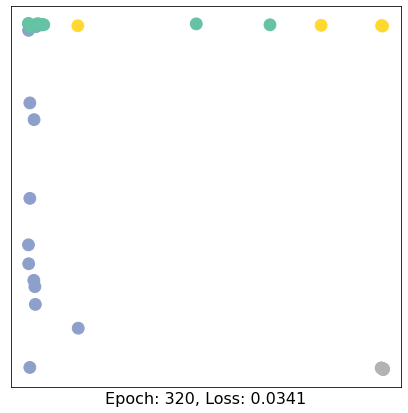

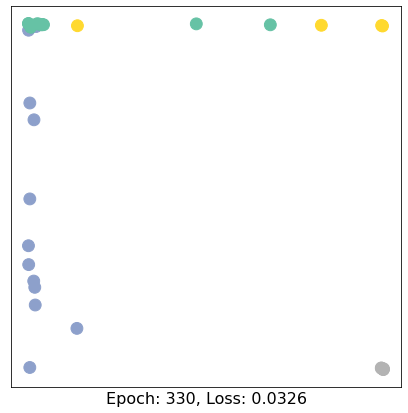

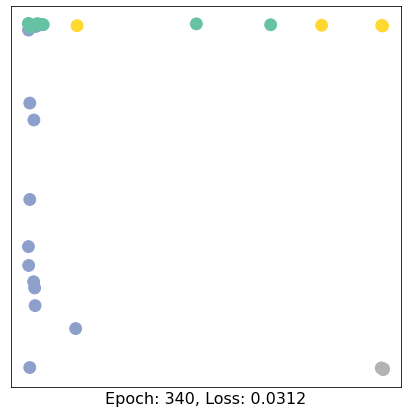

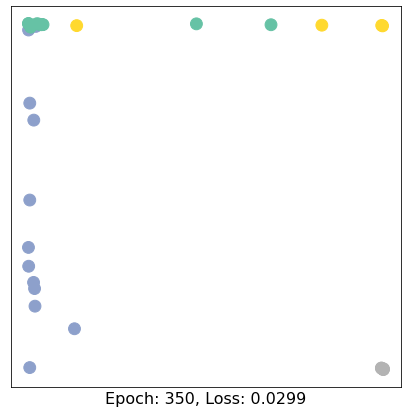

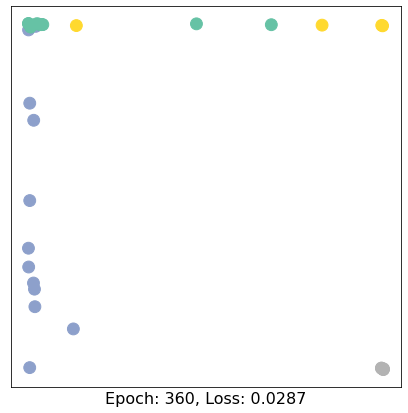

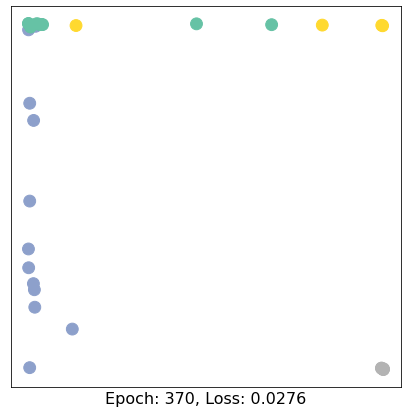

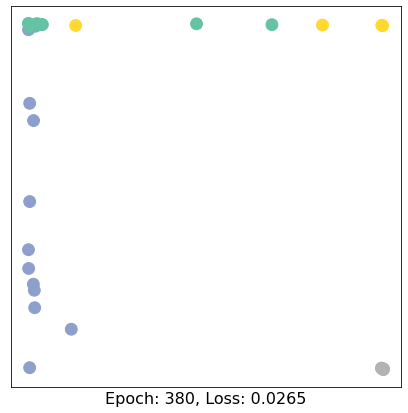

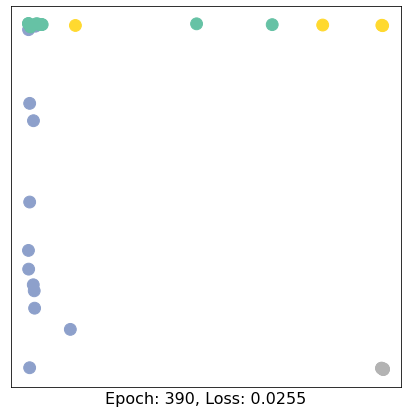

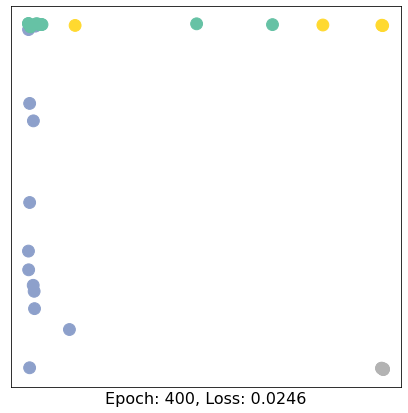

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  
    # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

Listing 6.48 インポートと可視化

In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

1.11.0+cu113


Listing 6.49 Coraの読み込み

In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

#>>> Dataset: Cora():
#>>> ======================
#>>> Number of graphs: 1
#>>> Number of features: 1433
#>>> Number of classes: 7

#>>> Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
#>>> ===========================================================================================================
#>>> Number of nodes: 2708
#>>> Number of edges: 10556
#>>> Average node degree: 3.90
#>>> Number of training nodes: 140
#>>> Training node label rate: 0.05
#>>> Has isolated nodes: False
#>>> Has self-loops: False
#>>> Is undirected: True


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


Processing...
Done!


Listing 6.50 入力ノードの特徴のみに基づくMLP

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(MLP, self).__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

#>>> MLP(
#>>>   (lin1): Linear(in_features=1433, out_features=16, bias=True)
#>>>   (lin2): Linear(in_features=16, out_features=7, bias=True)
#>>> )

MLP(
  (lin1): Linear(in_features=1433, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=7, bias=True)
)


Listing 6.51 MLPの学習

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(hidden_channels=16)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

#>>> Epoch: 001, Loss: 1.9615
#>>> Epoch: 002, Loss: 1.9557
#>>> Epoch: 003, Loss: 1.9505
#>>> Epoch: 004, Loss: 1.9423
#>>> Epoch: 005, Loss: 1.9327
#>>> .....
#>>> Epoch: 196, Loss: 0.3615
#>>> Epoch: 197, Loss: 0.3985
#>>> Epoch: 198, Loss: 0.4664
#>>> Epoch: 199, Loss: 0.3714
#>>> Epoch: 200, Loss: 0.3810

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9615
Epoch: 002, Loss: 1.9557
Epoch: 003, Loss: 1.9505
Epoch: 004, Loss: 1.9423
Epoch: 005, Loss: 1.9327
Epoch: 006, Loss: 1.9279
Epoch: 007, Loss: 1.9144
Epoch: 008, Loss: 1.9087
Epoch: 009, Loss: 1.9023
Epoch: 010, Loss: 1.8893
Epoch: 011, Loss: 1.8776
Epoch: 012, Loss: 1.8594
Epoch: 013, Loss: 1.8457
Epoch: 014, Loss: 1.8365
Epoch: 015, Loss: 1.8280
Epoch: 016, Loss: 1.7965
Epoch: 017, Loss: 1.7984
Epoch: 018, Loss: 1.7832
Epoch: 019, Loss: 1.7495
Epoch: 020, Loss: 1.7441
Epoch: 021, Loss: 1.7188
Epoch: 022, Loss: 1.7124
Epoch: 023, Loss: 1.6785
Epoch: 024, Loss: 1.6660
Epoch: 025, Loss: 1.6119
Epoch: 026, Loss: 1.6236
Epoch: 027, Loss: 1.5827
Epoch: 028, Loss: 1.5784
Epoch: 029, Loss: 1.5524
Epoch: 030, Loss: 1.5020
Epoch: 031, Loss: 1.5065
Epoch: 032, Loss: 1.4742
Epoch: 033, Loss: 1.4581
Epoch: 034, Loss: 1.4246
Epoch: 035, Loss: 1.4131
Epoch: 036, Loss: 1.4112
Epoch: 037, Loss: 1.3923
Epoch: 038, Loss: 1.3055
Epoch: 039, Loss: 1.2982
Epoch: 040, Loss: 1.2543


Listing 6.52 MLPの精度

In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

#>>> Test Accuracy: 0.5900

Test Accuracy: 0.5900


Listing 6.53 グラフ畳み込みの定義

In [ ]:
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

#>>> GCN(
#>>>   (conv1): GCNConv(1433, 16)
#>>>   (conv2): GCNConv(16, 7)
#>>> )

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


Listing 6.54 GCNのノードエンベディング

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


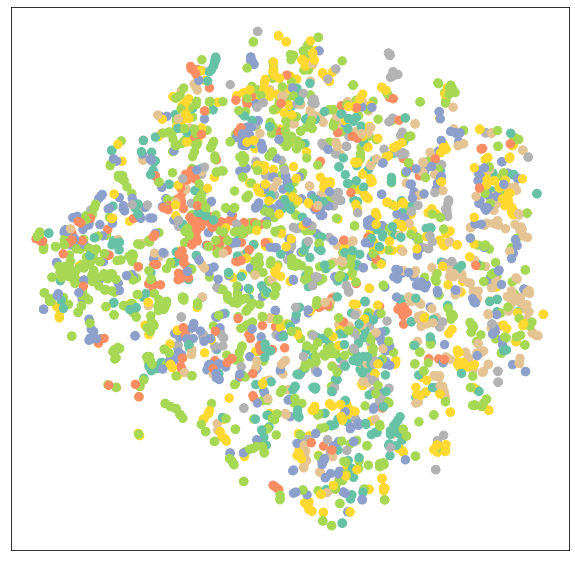

In [ ]:
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

Listing 6.55 GCNの訓練

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

#>>> Epoch: 001, Loss: 1.9463
#>>> Epoch: 002, Loss: 1.9409
#>>> Epoch: 003, Loss: 1.9343
#>>> Epoch: 004, Loss: 1.9275
#>>> Epoch: 005, Loss: 1.9181
#>>> .....
#>>> Epoch: 095, Loss: 0.5816
#>>> Epoch: 096, Loss: 0.5745
#>>> Epoch: 097, Loss: 0.5547
#>>> Epoch: 098, Loss: 0.5989
#>>> Epoch: 099, Loss: 0.6021
#>>> Epoch: 100, Loss: 0.5799

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9463
Epoch: 002, Loss: 1.9409
Epoch: 003, Loss: 1.9343
Epoch: 004, Loss: 1.9275
Epoch: 005, Loss: 1.9181
Epoch: 006, Loss: 1.9086
Epoch: 007, Loss: 1.9015
Epoch: 008, Loss: 1.8933
Epoch: 009, Loss: 1.8808
Epoch: 010, Loss: 1.8685
Epoch: 011, Loss: 1.8598
Epoch: 012, Loss: 1.8482
Epoch: 013, Loss: 1.8290
Epoch: 014, Loss: 1.8233
Epoch: 015, Loss: 1.8057
Epoch: 016, Loss: 1.7966
Epoch: 017, Loss: 1.7825
Epoch: 018, Loss: 1.7617
Epoch: 019, Loss: 1.7491
Epoch: 020, Loss: 1.7310
Epoch: 021, Loss: 1.7147
Epoch: 022, Loss: 1.7056
Epoch: 023, Loss: 1.6954
Epoch: 024, Loss: 1.6697
Epoch: 025, Loss: 1.6538
Epoch: 026, Loss: 1.6312
Epoch: 027, Loss: 1.6161
Epoch: 028, Loss: 1.5899
Epoch: 029, Loss: 1.5711
Epoch: 030, Loss: 1.5576
Epoch: 031, Loss: 1.5393
Epoch: 032, Loss: 1.5137
Epoch: 033, Loss: 1.4948
Epoch: 034, Loss: 1.4913
Epoch: 035, Loss: 1.4698
Epoch: 036, Loss: 1.3998
Epoch: 037, Loss: 1.4041
Epoch: 038, Loss: 1.3761
Epoch: 039, Loss: 1.3631
Epoch: 040, Loss: 1.3258


Listing 6.56 GCNの精度

In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

#>>> Test Accuracy: 0.8150

Test Accuracy: 0.8150


Listing 6.57 学習後GCNでのCoraエンベディング

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


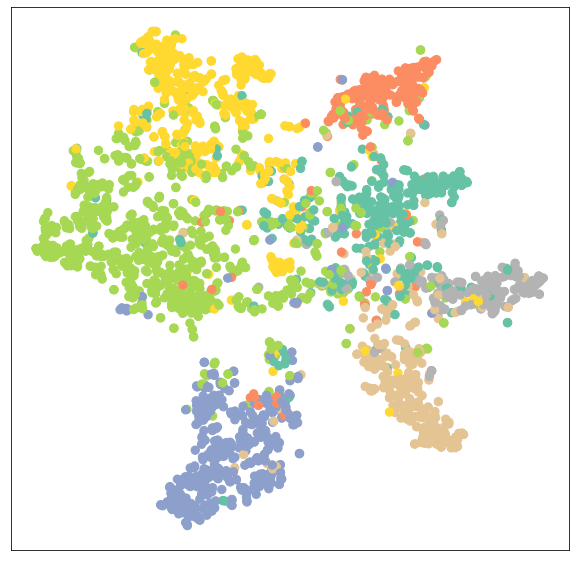

In [ ]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

PyTorch Geometricのインストール

In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

1.11.0+cu113


Listing 6.58 MUTAGデータセット

In [ ]:
import torch
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='data/TUDataset', name='MUTAG')

print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

#>>> Downloading https://www.chrsmrrs.com/graphkerneldatasets/MUTAG.zip
#>>> Extracting data/TUDataset/MUTAG/MUTAG.zip
#>>> Processing...


#>>> Dataset: MUTAG(188):
#>>> ====================
#>>> Number of graphs: 188
#>>> Number of features: 7
#>>> Number of classes: 2

#>>> Data(x=[17, 7], edge_index=[2, 38], edge_attr=[38, 4], y=[1])
#>>> =============================================================
#>>> Number of nodes: 17
#>>> Number of edges: 38
#>>> Average node degree: 2.24
#>>> Has isolated nodes: False
#>>> Has self-loops: False
#>>> Is undirected: True

#>>> Done!

Extracting data/TUDataset/MUTAG/MUTAG.zip
Processing...
Done!



Dataset: MUTAG(188):
Number of graphs: 188
Number of features: 7
Number of classes: 2

Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])
Number of nodes: 17
Number of edges: 38
Average node degree: 2.24
Has isolated nodes: False
Has self-loops: False
Is undirected: True


Listing 6.59 データセットのshuffle

In [ ]:
torch.manual_seed(12345)
dataset = dataset.shuffle()

train_dataset = dataset[:150]
test_dataset = dataset[150:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

#>>> Number of training graphs: 150
#>>> Number of test graphs: 38

Number of training graphs: 150
Number of test graphs: 38


Listing 6.60 PyTorch Geometricのバッチ

In [ ]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

#>>> Step 1:
#>>> =======
#>>> Number of graphs in the current batch: 64
#>>> Batch(edge_attr=[2560, 4], edge_index=[2, 2560], x=[1154, 7], y=[64], batch=[1154], ptr=[65])

#>>> Step 2:
#>>> =======
#>>> Number of graphs in the current batch: 64
#>>> Batch(edge_attr=[2454, 4], edge_index=[2, 2454], x=[1121, 7], y=[64], batch=[1121], ptr=[65])

#>>> Step 3:
#>>> =======
#>>> Number of graphs in the current batch: 22
#>>> Batch(edge_attr=[980, 4], edge_index=[2, 980], x=[439, 7], y=[22], batch=[439], ptr=[23])

Step 1:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 2636], x=[1188, 7], edge_attr=[2636, 4], y=[64], batch=[1188], ptr=[65])

Step 2:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 2506], x=[1139, 7], edge_attr=[2506, 4], y=[64], batch=[1139], ptr=[65])

Step 3:
Number of graphs in the current batch: 22
DataBatch(edge_index=[2, 852], x=[387, 7], edge_attr=[852, 4], y=[22], batch=[387], ptr=[23])



Listing 6.61 グラフ分類のGCN

In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        
        return x

model = GCN(hidden_channels=64)
print(model)

#>>> GCN(
#>>>   (conv1): GCNConv(7, 64)
#>>>   (conv2): GCNConv(64, 64)
#>>>   (conv3): GCNConv(64, 64)
#>>>   (lin): Linear(in_features=64, out_features=2, bias=True)
#>>> )

GCN(
  (conv1): GCNConv(7, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


Listing 6.62 グラフ分類の性能評価

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.

for epoch in range(1, 171):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

#>>> Epoch: 001, Train Acc: 0.6467, Test Acc: 0.7368
#>>> Epoch: 002, Train Acc: 0.6467, Test Acc: 0.7368
#>>> Epoch: 003, Train Acc: 0.6467, Test Acc: 0.7368
#>>> Epoch: 004, Train Acc: 0.6467, Test Acc: 0.7368
#>>> Epoch: 005, Train Acc: 0.6467, Test Acc: 0.7368
#>>> ...
#>>> Epoch: 166, Train Acc: 0.7733, Test Acc: 0.7632
#>>> Epoch: 167, Train Acc: 0.7867, Test Acc: 0.7895
#>>> Epoch: 168, Train Acc: 0.7867, Test Acc: 0.7895
#>>> Epoch: 169, Train Acc: 0.8000, Test Acc: 0.7632
#>>> Epoch: 170, Train Acc: 0.8000, Test Acc: 0.7632

<IPython.core.display.Javascript object>

Epoch: 001, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 002, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 003, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 004, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 005, Train Acc: 0.6467, Test Acc: 0.7368
Epoch: 006, Train Acc: 0.6533, Test Acc: 0.7368
Epoch: 007, Train Acc: 0.7467, Test Acc: 0.7632
Epoch: 008, Train Acc: 0.7267, Test Acc: 0.7632
Epoch: 009, Train Acc: 0.7200, Test Acc: 0.7632
Epoch: 010, Train Acc: 0.7133, Test Acc: 0.7895
Epoch: 011, Train Acc: 0.7200, Test Acc: 0.7632
Epoch: 012, Train Acc: 0.7200, Test Acc: 0.7895
Epoch: 013, Train Acc: 0.7200, Test Acc: 0.7895
Epoch: 014, Train Acc: 0.7133, Test Acc: 0.8421
Epoch: 015, Train Acc: 0.7133, Test Acc: 0.8421
Epoch: 016, Train Acc: 0.7533, Test Acc: 0.7368
Epoch: 017, Train Acc: 0.7400, Test Acc: 0.7632
Epoch: 018, Train Acc: 0.7133, Test Acc: 0.8421
Epoch: 019, Train Acc: 0.7400, Test Acc: 0.7895
Epoch: 020, Train Acc: 0.7533, Test Acc: 0.7368
Epoch: 021, Train Acc: 0.7467, Test Acc: